# Đồ Án Lập Trình cho Khoa Học Dữ Liệu

## Thành viên
| Mã số sinh viên | Học và tên                                           |
|:---------------:|:-----------------------------------------------------|
|18120225         | [Trần Thanh Phúc](https://github.com/PhucThanh)      |
|18120221         | [Nguyễn Điền Thanh Phong](https://github.com/sgrayk) |

---

## Môi trường code

In [1]:
!which python 

/home/workspace/miniconda3/envs/p4ds-env/bin/python


---

## Các thư viện sử dụng

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

## Các thư viện bổ sung được sử dụng

In [3]:
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

In [4]:
import seaborn as sns

*Đây là thư viện hổ trợ đồ họa, giúp việc visualization dễ dàng hơn*

---

## Thu thập dữ liệu

TV Shows and Movies listed on Netflix

Dataset này bao gồm tv shows và movies khả dụng trên Netflix của năm 2019. Tập dữ liệu được thu thập từ Flixable, một công cụ tìm kiếm Netflix của bên thứ ba.

Vào năm 2018, họ đã phát hành một báo cáo thú vị cho thấy số lượng chương trình truyền hình trên Netflix đã tăng gần gấp ba lần kể từ năm 2010. Số lượng phim của dịch vụ phát trực tuyến đã giảm hơn 2.000 tựa kể từ năm 2010, trong khi số lượng chương trình truyền hình của nó tăng gần gấp ba lần. Sẽ rất thú vị khi khám phá xem tất cả những thông tin chi tiết khác có thể thu được từ cùng một tập dữ liệu.


---

# Khám phá dữ liệu và tiền xử lý

In [5]:
df_movies=pd.read_csv("./datasheet/netflix_titles.csv")
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [6]:
n_rows,n_cols=df_movies.shape
print(f'Dữ liệu có {n_rows} dòng và {n_cols} cột.')

Dữ liệu có 7787 dòng và 12 cột.


Mỗi dòng là một bộ phim hoặc TV Show đã chiếu trên Netflix. Không có vấn đề mỗi dòng có ý nghĩa khác nhau.

## Kiểm tra lặp dữ liệu

In [7]:
assert(len(df_movies['show_id'].unique())==n_rows)

Ta thấy mỗi phim có một `show_id` khác nhau và số id khác nhau cũng bằng với số dòng nên không có trường hợp lặp dữ liệu.

## Ý nghĩa mỗi cột trong Dữ liệu

- **show_id**: các giá trị đơn lập giúp xác định một Chương trình.
- **type**: loại chương trình của Netflix, là Movie hoặc TV Show.
- **title**: tên chương trình được phát trên Netflix.
- **director**: danh sách đạo diễn chương trình
- **cast**: danh sách các diễn viên trong Chương trình, ngăn cách bởi dấu ","
- **country**: danh sách tên các nước cùng sản xuất 
- **date_added**: thời gian được thêm vào Netflix
- **release_year**: năm sản xuất chương trình
- **rating**: đánh giá phim thuộc thể loại nào và mức độ của nó
- **duration**: thời lượng chương trình, có thể kéo dài trong hơn một mùa,...
- **listed_in**: danh sách thể loại chương trình
- **description**: mô tả chương trình

## Kiểm tra loại dữ liệu của mỗi cột có đơn nhất không?

In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
def open_object_dtype(s):
    
    dtypes = set(s.apply(type))
    
    return dtypes

for col in df_movies.columns:
    print("Column %12s có kiểu dữ liệu: %s" % (col, open_object_dtype(df_movies[col])))

Column      show_id có kiểu dữ liệu: {<class 'str'>}
Column         type có kiểu dữ liệu: {<class 'str'>}
Column        title có kiểu dữ liệu: {<class 'str'>}
Column     director có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column         cast có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column      country có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column   date_added có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column release_year có kiểu dữ liệu: {<class 'int'>}
Column       rating có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column     duration có kiểu dữ liệu: {<class 'str'>}
Column    listed_in có kiểu dữ liệu: {<class 'str'>}
Column  description có kiểu dữ liệu: {<class 'str'>}


**Vấn đề cần tiền xử lý:**
Theo thông tin ta nhận được ở trên, ta có những đánh giá sau: 
- Cột `date_added` đang có dtype là `str` và `float`. Để đúng về ý nghĩa, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `datetime`.
- Cột `country` và `rating` có dtype gồm 2 loại là `str` và `float`, ta sẽ tiền xử lý để thống nhất `dtype` là `str` 
- Cột `director`, `cast` có dtype gồm 2 loại là `str` và `float`, ta sẽ tiền xử lý để thống nhất `dtype` là `str` rồi sau đó chuyển thành danh sách `numpy.array`.
- Cột `listed_in` có dtype là `str` nhưng bản thân nó là một danh sách, do đó, ta sẽ cần đưa nó về `numpy.aray`
- Cột `duration` có dtype là `str` nhưng bản thân nó bao gồm cả giá trị độ lớn và đơn vị, do đó ta cũng cần xử lý nó về 2 cột riêng.
- Hầu hết các cột có giá trị `float` là vì các cột có giá trị `nan`

## Xử lý cột Title 

Việc tách tên phim bằng dấu : có thể hữu ích trong việc tìm các phim liên quan. Chẳng hạn dòng phim Transformers thường có tên phim là `Transformer:<tên của tập phim>`. Bằng cách tách được tên phim như vậy chúng ta có thể recommend các tập khác nhau của một phim.

In [10]:
asdf = df_movies.loc[:,['title']].copy()
asdf['title'].apply(lambda x:x[x.find(":")+1:] if x.find(":")>=0 else np.nan)
asdf

# df_movies['title'].apply(lambda x:x[x.find(":")+1:] if x.find(":")>=0 else np.nan)

# df_movies['title'].apply(lambda x:x[:x.find(":")] if x.find(":")>=0 else x)

,title
0,3%
1,7:19
2,23:59
3,9
4,21
...,...
7782,Zozo
7783,Zubaan
7784,Zulu Man in Japan
7785,Zumbo's Just Desserts


In [11]:
df_movies['title_postfix']=df_movies['title'].apply(lambda x:x[x.find(":")+1:] if x.find(":")>=0 else np.nan)

In [12]:
df_movies['title_prefix']=df_movies['title'].apply(lambda x:x[:x.find(":")] if x.find(":")>=0 else x)

In [13]:
df_movies.title_prefix.value_counts()[df_movies.title_prefix.value_counts()>4]

NOVA                              19
Monster High                      13
True                              10
Trailer Park Boys                  9
Krish Trish and Baltiboy           8
Kevin Hart                         8
ReMastered                         8
Jeff Dunham                        7
Dragons                            6
Transformers                       5
Bill Burr                          5
Super Monsters                     5
Little Singham                     5
Katt Williams                      5
Bill Hicks                         5
Iliza Shlesinger                   5
Star Trek                          5
Barbie                             5
Jim Gaffigan                       5
My Little Pony Equestria Girls     5
Name: title_prefix, dtype: int64

## Xử lý cột đạo diễn
Phim có nhiều đạo diễn sẽ được ngăn bởi dấu ,

In [14]:
#df_movies['director'].fillna("Unknow",inplace=True)

In [15]:
df_movies['director']=df_movies['director'].apply(lambda x:str(x).split(", "))

In [16]:
df_movies['director'].sample(6)

7021    [Ali F. Mostafa]
1526               [nan]
7225               [nan]
7677               [nan]
2323      [Hoyt Yeatman]
5464    [Advait Chandan]
Name: director, dtype: object

Những phim không có đạo diễn sẽ là list nan: [nan]. Ta sẽ thay thế nó bằng list rỗng.

In [17]:
df_movies['director']=df_movies['director'].apply(lambda x:[] if str(x)=="['nan']" else x)
df_movies['director'].sample(6)

1776                                 []
1426    [Phil Lord, Christopher Miller]
4601                                 []
5401                [V. Scott Balcerek]
5829                                 []
6485                      [Jim Strouse]
Name: director, dtype: object

## Xử lý cột cast thành mảng diễn viên

In [18]:
df_movies['cast'].head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

Ta để ý tên diễn viên được cách nhau bởi `,_` (có khoảng trắng phía sau dấu ,)

In [19]:
df_movies['cast_array']=df_movies['cast'].apply(lambda x:str(x).split(", "))
df_movies['cast_array'].head()

0    [João Miguel, Bianca Comparato, Michel Gomes, ...
1    [Demián Bichir, Héctor Bonilla, Oscar Serrano,...
2    [Tedd Chan, Stella Chung, Henley Hii, Lawrence...
3    [Elijah Wood, John C. Reilly, Jennifer Connell...
4    [Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...
Name: cast_array, dtype: object

## Xử lý cột duration
Cột duration có 2 đơn vị là season hoặc min. Giả thiết đưa ra là những dòng có đơn vị là season là TV show, đơn vị min là phim lẻ. Ta sẽ kiểm tra điều này bằng cách đếm giá trị như sau.

In [20]:
#Số lượng Movie và TV Show
df_movies['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [21]:
#Số lượng dòng với duration có chữ min:
df_movies['duration'].apply(lambda x:x.find("min")>=0).sum()

5377

Đều là 5377 nên giả thiết của chúng ta là đúng. Chúng ta sẽ tách cột duration thành `season` thể hiện số season và `min` thể hiện số phút của phim. Mục đích điều này có thể giúp ta xử lý dễ dàng hơn các thao tác như sort theo season, min trong tương lai.

In [22]:
df_movies['min']=df_movies['duration'][df_movies['duration'].apply(lambda x:x.find("min")>=0)]
df_movies['season']=df_movies['duration'][df_movies['duration'].apply(lambda x:x.find("Season")>=0)]

Ta cũng sẽ xóa chữ min và season(s) trên 2 cột ta mới tạo.

In [23]:
df_movies['min']=df_movies['min'].apply(lambda x:x[:-4] if pd.notnull(x) else np.nan)
df_movies['season']=df_movies['season'].apply(lambda x:x.replace('Seasons','').replace('Season','') if pd.notnull(x) else np.nan)

In [24]:
# Đổi kiểu dữ liệu thành số
#Float vì không bị lỗi khi chuyển NaN
df_movies['min']=df_movies['min'].astype('float') 
df_movies['season']=df_movies['season'].astype('float')

## Xử lý listed_in

Đầu tiên ta phải thông kê có tất cả bao nhiêu thể loại phim

In [25]:
# Chuyển listed_in thành mảng
df_movies['listed_in_array']=df_movies['listed_in'].apply(lambda x:str(x).split(", "))
df_movies['listed_in_array'].head()

0    [International TV Shows, TV Dramas, TV Sci-Fi ...
1                       [Dramas, International Movies]
2                [Horror Movies, International Movies]
3    [Action & Adventure, Independent Movies, Sci-F...
4                                             [Dramas]
Name: listed_in_array, dtype: object

Để kiểm tra các giá trị có thể có, ta cộng tất cả các mảng trên lại và lấy giá trị unique:

In [26]:
listed_unique=np.unique(df_movies['listed_in_array'].sum())
listed_unique

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror',
       'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers',
       'Teen TV Shows', 'Thrillers'], dtype='<U28')

Có vẻ như nhiều thể loại phim chỉ khác nhau do có chữ TV phía trước: chẳng hạn như `Dramas` và `TV Dramas`. Ta đã có cột `type` cho biết loại phim rồi nên để thêm TV vào đây sẽ dư thừa. Chúng ta sẽ gộp các thể loại có chữ TV vào loại không có TV tương ứng (`TV Dramas` thành `Dramas`). Tuy nhiên trước khi làm điều này ta phải kiểm tra bảo đảm giả thiết chúng ta đưa ra là phù hợp. Cụ thể ta sẽ kiểm tra: 
* Có phải toàn bộ `TV Show` đều có chữ TV trong `list_in` không. Lưu ý là list_in chứa nhiều thể loại nên ta cần phải kiểm tra toàn bộ.

Mục đích của việc làm trên có thể giúp ích cho hệ thống recommendation sau này. Khi một người coi thể loại Thrillers thì chúng ta có thể không cần quan tâm Thrillers đó là movie hay là TV show.

### Loại bỏ từ TV khỏi một số thể loại

In [27]:
TV_show_count=len(df_movies[df_movies['type']=='TV Show'])
print(f'Có {TV_show_count} TV show.')

Có 2410 TV show.


In [28]:
#Ta tạo thêm m là lọc ra các dòng chỉ chứa TV show
m=df_movies[df_movies['type']=='TV Show']

In [29]:
#Số lượng phim có thể loại chứa chữ TV trong toàn bộ bảng
s1=sum(df_movies['listed_in_array'].apply(lambda l:any(x.find("TV")>=0 for x in l)))
print(f'Có tổng cộng {s1} dòng có chứa ít nhất 1 chữ TV trong listed_in')

Có tổng cộng 2319 dòng có chứa ít nhất 1 chữ TV trong listed_in


In [30]:
#Số lượng phim có thể loại chứa chữ TV trong các TV Show
s2=sum(m['listed_in_array'].apply(lambda l:any(x.find("TV")>=0 for x in l)))
print(f'Trong số các TV show, có tổng cộng {s2} dòng có chứa ít nhất 1 chữ TV trong listed_in')

Trong số các TV show, có tổng cộng 2319 dòng có chứa ít nhất 1 chữ TV trong listed_in


Ta tính 2 lần như trên để đảm bảo rằng không có phim nào (Không phải TV Show) mà có chứa chữ TV trong thể loại. Trong số 2410 TV show có 2319 show có thể loại chứa chữ TV trong đó. Như vậy ta có thể an toàn xóa đi các chữ TV trong `listed_in_array`. Sau khi xóa xong chung ta vẫn biết phim đó có phải là TV show hay không nhờ vào cột `type`.

Tuy nhiên cần lưu ý một vài thể loại sẽ không có dạng không có chữ `TV` tương ứng. Ví dụ `Reality TV` sẽ không có thể loại `Reality` tương ứng.

Ta sẽ tạo ra một dict có dạng sau:
```
{
    'TV Dramas':'Dramas',
    'TV Action & Adventure':'Action & Adventure',
    ...
}
```

In [31]:
#Tạo ra array chứa thể loại có chữ TV
TV_listed=[a for a in listed_unique if a.find("TV")>=0]

#Array chứa thể loại có chữ TV sau khi xóa TV
TV_listed_remove=[a.replace("TV ","").replace("TV","") for a in TV_listed]

#Array chứa thể loại không có chữ TV
TV_listed_noTV=[a for a in listed_unique if a.find("TV")==-1]

#Danh sách các từ có thể thay thế
to_replace_list=list(set(TV_listed_remove).intersection(TV_listed_noTV))
to_replace_list

['Comedies', 'Dramas', 'Sci-Fi & Fantasy', 'Action & Adventure', 'Thrillers']

In [32]:
#Các từ ở trên nằm tại các vị trí sau:
id_to_replace=[item[0] for item in enumerate(TV_listed_remove) if item[1] in to_replace_list]
id_to_replace

[10, 11, 12, 15, 17]

In [33]:
#Các từ cần thay thế
to_replace=[TV_listed[i] for i in id_to_replace]
to_replace

['TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers']

In [34]:
#Tạo dict map từ cần thay thế và từ thay thế
replace_dict=dict((el,el.replace("TV ","")) for el in to_replace)
replace_dict

{'TV Action & Adventure': 'Action & Adventure',
 'TV Comedies': 'Comedies',
 'TV Dramas': 'Dramas',
 'TV Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
 'TV Thrillers': 'Thrillers'}

In [35]:
#Tiến hành thay thế
df_movies['listed_in_array']=df_movies['listed_in_array'].apply(lambda x:[replace_dict.get(i,i) for i in x])

In [36]:
#Kiểm tra lại kết quả
listed_unique=np.unique(df_movies['listed_in_array'].sum())
listed_unique

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Horror', 'TV Mysteries', 'TV Shows', 'Teen TV Shows',
       'Thrillers'], dtype='<U28')

### One hot encoding listed_in_array
Ta đã tạo ra `listed_in_array` là mảng các thể loại của phim. Để dễ xử lý hơn ta sẽ chuyển thể loại này thành dang One hot. Mỗi thể loại sẽ có một cột riêng, phim nào thuộc thể loại nào sẽ có giá trị bằng 1 tại cột thể loại đó.

Code được tham khảo tại

https://stackoverflow.com/questions/52989660/pandas-python-how-to-one-hot-encode-a-column-that-contains-an-array-of-strings

In [37]:
df_movies=df_movies.join(pd.get_dummies(df_movies.listed_in_array.apply(pd.Series).stack()).sum(level=0))

In [38]:
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Horror,TV Mysteries,TV Shows,Teen TV Shows,Thrillers
0,s1,TV Show,3%,[],"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,0,0,0,0,0,0,0,0,0,0
1,s2,Movie,7:19,[Jorge Michel Grau],"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,0,0,0,0,0,0,0,0,0,0
2,s3,Movie,23:59,[Gilbert Chan],"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,...,0,0,0,0,0,0,0,0,0,0
3,s4,Movie,9,[Shane Acker],"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,...,0,0,0,0,0,0,0,0,0,0
4,s5,Movie,21,[Robert Luketic],"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,...,0,0,0,0,0,0,0,0,0,0


Sau khi xử lý ta có thể khá nhiều cột.

## Xử lý Country
Cột country cũng cần xử lý đưa về mảng.

In [39]:
df_movies['country'].value_counts()

United States                       2555
India                                923
United Kingdom                       397
Japan                                226
South Korea                          183
                                    ... 
Canada, Belgium                        1
Australia, India                       1
India, Switzerland                     1
Finland, Germany                       1
United States, India, Bangladesh       1
Name: country, Length: 681, dtype: int64

## Chuyển `data_added` thành Datetime

In [40]:
df_movies['country']=df_movies['country'].apply(lambda x:str(x).split(", "))
df_movies['country']

0                                                [Brazil]
1                                                [Mexico]
2                                             [Singapore]
3                                         [United States]
4                                         [United States]
                              ...                        
7782    [Sweden, Czech Republic, United Kingdom, Denma...
7783                                              [India]
7784                                                [nan]
7785                                          [Australia]
7786              [United Kingdom, Canada, United States]
Name: country, Length: 7787, dtype: object

In [41]:
df_movies['date_added']=pd.to_datetime(df_movies['date_added'])
df_movies['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7787, dtype: datetime64[ns]

## Xử lý giá trị thiếu

Ta sẽ duyệt qua từng cột có giá trị thiếu và xem xét chúng ta có thể fill dữ liệu thiếu không. Sau khi xem xét thì thấy rằng các cột `director`,`cast`,`country` sẽ không thể fill được vì sẽ gây ra sai lệch lớn về mặt ý nghĩa trong dữ liệu. Ta chỉ có thể fill cho hai cột có dữ liệu thiếu là `date_added` và `rating`.

In [42]:
#Fill rating bằng mode.
df_movies['rating']=df_movies['rating'].fillna(df_movies['rating'].mode())

Tìm khoảng cách trung bình giữa date_added và realease_year

In [43]:
added_release_gap=(df_movies['date_added'].dt.year-df_movies['release_year']).median()
added_release_gap

1.0

In [44]:
# Fill tạm
df_movies['date_added']=df_movies['date_added'].fillna(df_movies['date_added'].mean())

In [45]:
#df_movies.loc[df_movies['date_added'].isnull(),'date_added']= df_movies.loc[df_movies['date_added'].isnull(),'release_year']

# Phân bố các giá trị và kiểm tra bất thường

### Kiểm tra ngày sản xuất và thêm vào

Ta sẽ xếp các cột `date_added` vào nhóm numeric, do đó hiện có 2 cột thuộc nhóm numeric: "release_year", "date_added".

Với mỗi cột numeric ta sẽ xem những thông tin mô tả dữ liệu.   

In [46]:
nume_col_profiles_df = df_movies.loc[:,['release_year', 'date_added']] \
                                 .agg([lambda x: pd.Series.describe(x, datetime_is_numeric=True)])

nume_col_profiles_df.columns = ['release_year', 'date_added']

nume_col_profiles_df

,release_year,date_added
count,7787.000000,7787
mean,2013.932580,2019-01-02 19:20:57.708627968
std,8.757395,NaN
min,1925.000000,2008-01-01 00:00:00
25%,2013.000000,2018-02-01 00:00:00
50%,2017.000000,2019-03-07 00:00:00
75%,2018.000000,2020-01-17 12:00:00
max,2021.000000,2021-01-16 00:00:00


Dựa vào bảng giá trị, ta có những nhận xét sơ như sau:
- Nextflix đã thêm những chương trình được sản xuất vào năm 1925 dù bộ phim đầu tiên năm 1895 và Netflix được ra đời năm 1997, vậy thì tại sao Netflix lại chọn bộ phim cũ như vậy?  
- Dữ liệu cuối cùng là năm 2021, có thể người thu thập chỉ cập nhật chọn thời điểm 2008 - 2021 nên dữ liệu có vẻ không đầy đủ. 
- Mức 25% là năm 2013, trong khi 0% là 1925, vậy những bộ phim hay chương trình vào thời điểm trước 2013 khá hạn chế, có thể sau năm 2013 thì ngành điện ảnh phát triển hơn.

**Kiểm tra bất thường:**
- Trên là 2 cột numeric nhưng chúng là có liên hệ với nhau, thông thường cột `release_year` sẽ phải có giá trị nhỏ hơn `date_added` theo như ta phỏng đoán, Netflix chờ phim sản xuất xong thì mới thêm vào kho dữ liệu, điều này có đúng không?

In [47]:
df_movies.loc[df_movies['date_added'].dt.year < df_movies['release_year'],['type','title','date_added','release_year']]

,type,title,date_added,release_year
583,TV Show,Arrested Development,2018-05-29,2019
1025,TV Show,BoJack Horseman,2019-10-25,2020
2311,TV Show,Fuller House,2019-12-06,2020
2602,Movie,Hans Teeuwen: Real Rancour,2017-07-01,2018
2741,TV Show,Hilda,2020-12-14,2021
2981,Movie,Incoming,2018-10-26,2019
3098,TV Show,Jack Taylor,2013-03-31,2016
3926,TV Show,Maradona in Mexico,2019-11-13,2020
5493,TV Show,Sense8,2016-12-23,2018
6462,TV Show,The Hook Up Plan,2019-10-11,2020


**Nhận xét:**
- Đối với những dữ liệu TV Show, sau khi kiểm tra, có thể Netflix chọn thời điểm ra mắt là tập cuối của phim, do đó, ngày phát hành sẽ là ngày sau khi thêm vào Netflix.
- Hiện tại đây là một bất thường phát hiện được và chưa có lời giải thích tốt. Chúng ta thấy khoảng cách giữa 2 năm trong trường hợp này thường chỉ khoảng 1 năm.

### Kiểm tra Director

<AxesSubplot:>

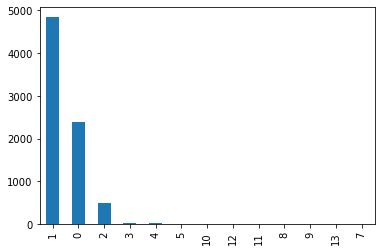

In [48]:
df_movies['director'].apply(lambda x:len(x)).value_counts().plot.bar()

Đa số phim có 1 đạo diễn. Có khá nhiều phim 0 đạo diễn, cũng là giá trị thiếu của cột.

In [49]:
# Đạo diễn tham gia nhiều phim nhất
z=df_movies['director'].sum()
#Lấy top 15
for country,times in Counter(z).most_common(15):
    print("%-20s %4.1d" % (country, times))

Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Steven Spielberg       10
Shannon Hartman         9
Anurag Kashyap          9
David Dhawan            9
Kunle Afolayan          8
Justin G. Dyck          8
Umesh Mehra             8


In [50]:
# Tập hợp các đạo diễn tham gia nhiều phim nhất
df_movies['director'].apply(lambda x:str(x)).value_counts()

[]                                         2389
['Raúl Campos', 'Jan Suter']                 18
['Marcus Raboy']                             16
['Jay Karas']                                14
['Cathy Garcia-Molina']                      13
                                           ... 
['Arjun Jandyala']                            1
['Olivier Megaton']                           1
['Kiko Cruz Claverol', 'Patricia Font']       1
['Blayne Weaver']                             1
['Bo Burnham']                                1
Name: director, Length: 4050, dtype: int64

Ta thấy Jan Suter và Raúl Campos cùng làm 18 phim. Tuy nhiên tổng thể thì Raúl Campos làm tổng cộng 19 phim còn Jan Suter làm 21 phim. Có thể thấy 2 đạo diễn này đa số là làm chung phim.

Hiện tại không có gì bất thường tại cột đạo diễn ngoài việc dữ liệu thiếu

### Kiểm tra Cast

<AxesSubplot:>

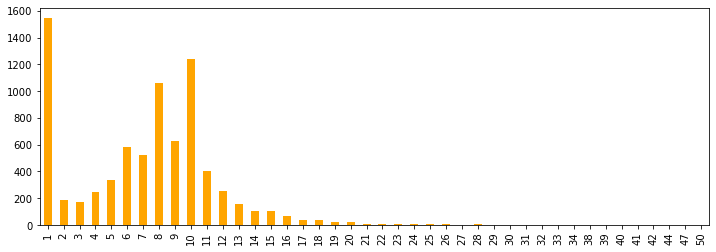

In [51]:
#Đếm số lượng diễn viên
z=df_movies['cast_array'].apply(lambda x:len(x)).value_counts()

z.sort_index().plot.bar(figsize=(12,4),color='orange')

### Kiểm tra Country
Xem phân bố dữ liệu theo số nước

<AxesSubplot:>

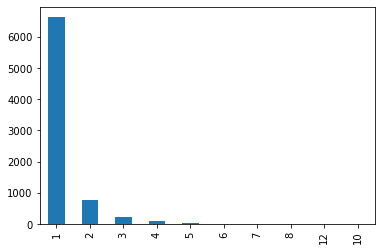

In [52]:
df_movies['country'].apply(lambda x:len(x)).value_counts().plot.bar()

Đa số phim được làm bởi 1 nước. Có phim được làm bởi tận 12 nước. Chúng ta xem nước nào làm nhiều phim nhất.

In [53]:
from collections import Counter
z=df_movies['country'].sum()

#Lấy top 15
for country,times in Counter(z).most_common(15):
    print("%-20s %4.1d" % (country, times))

United States        3296
India                 990
United Kingdom        722
nan                   507
Canada                412
France                349
Japan                 287
Spain                 215
South Korea           212
Germany               199
Mexico                154
China                 147
Australia             144
Egypt                 110
Turkey                108


Mỹ làm nhiều phim nhất sau đó đến Ấn độ,...

### Kiểm tra Season và Min

Phân bố số phút của phim

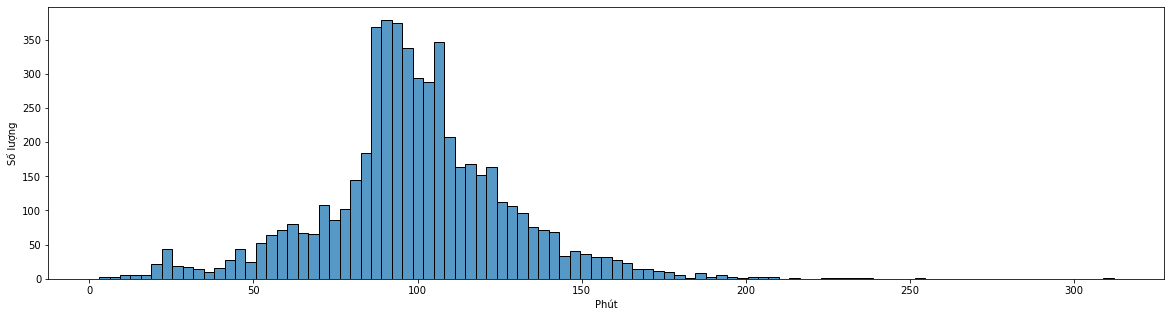

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
sns.histplot(x='min',data=df_movies)
plt.xlabel("Phút")
plt.ylabel("Số lượng")
plt.show()

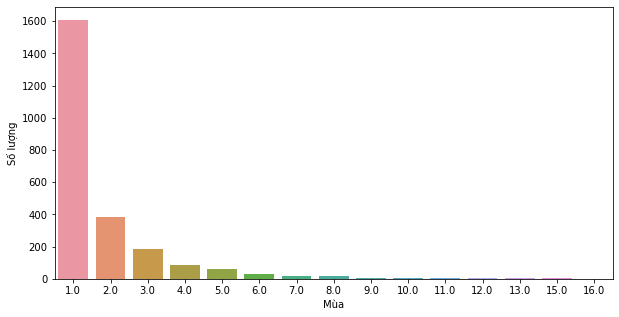

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.countplot(x='season',data=df_movies)
plt.xlabel("Mùa")
plt.ylabel("Số lượng")
plt.show()

**Nhận xét**
- Hầu hết các phim lẻ đều chọn khoảng thời gian 90 phút.
- Phim ngắn nhất là 3 phút và dài nhất là 312 phút, khá thú vị, ta sẽ xem xem là phim gì.


In [56]:
df_movies['min'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: min, dtype: float64

In [57]:
df_movies['season'].describe()

count    2410.000000
mean        1.775934
std         1.596359
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: season, dtype: float64

In [58]:
df_movies[(df_movies['min']==3)|(df_movies['min']==312)][['title','duration','listed_in','country']]

,title,duration,listed_in,country
957,Black Mirror: Bandersnatch,312 min,"Dramas, International Movies, Sci-Fi & Fantasy",[United States]
5605,Silent,3 min,"Children & Family Movies, Sci-Fi & Fantasy",[United States]


**Nhận xét**
* Phim có thời lượng ngắn nhất là 3 phút với 1 phim. Sau khi tìm hiểu thì đây là một bộ phim ngắn.
* Phim có thời lượng dài nhất là 312 phút với 1 phim. Đây là một phim interactive, trong đó người xem có thể tương tác với phim. Thời lượng 312 phút có thể là toàn bộ cảnh phim có thể xảy ra.
* Thời lượng phim trung bình khoảng 100 phút.
* Đối với `TV Show`, số lượng các chương trình có 1 mùa nhiều gấp đôi các mùa khác cộng lại. Để có thể duy trì nhiều mùa có vẻ khó, ta sẽ tìm hiểu `TV show` nào nhiều mùa nhất.

### Kiểm tra Description

In [59]:
## Kiểm tra description
df_movies['description'].describe()

count                                                  7787
unique                                                 7769
top       A surly septuagenarian gets another chance at ...
freq                                                      3
Name: description, dtype: object

Có 7787 description nhưng chỉ có 7769 giá trị khác nhau. Có một nội dung xuất hiện 3 lần. Ta kiểm tra rằng có phải trùng description là trùng tên phim hay không

In [60]:
des_c=df_movies['description'].value_counts()

#desc_list danh sách các description xuất hiện nhiều hơn 1 lần
desc_list=des_c[des_c>1].index.to_list()

In [61]:
#Lấy các dòng có description xuất hiện nhiều hơn 1 lần
df1 = df_movies[df_movies.groupby(['description'])['show_id'].transform('count') > 1][['title_prefix','description']]

#Group ID để tô màu
df1['grpId']=df1.groupby('description').ngroup().add(1)
df1=df1.sort_values(by='grpId')
df1.head()

,title_prefix,description,grpId
7129,Together For Eternity,A scheming matriarch plots to cut off her disa...,1
2860,Hum Saath-Saath Hain,A scheming matriarch plots to cut off her disa...,1
4595,Oh! Baby (Tamil),A surly septuagenarian gets another chance at ...,2
4594,Oh! Baby (Malayalam),A surly septuagenarian gets another chance at ...,2
4593,Oh! Baby,A surly septuagenarian gets another chance at ...,2


In [62]:
def rowStyle(row):
    if row.grpId %2 ==0:
        return ['background-color: #F4ECD6'] * len(row)
    return ['background-color: #A7CAB1'] * len(row)

df1.style.apply(rowStyle,axis=1)

#Tô màu cột index
df1.reset_index().rename(columns={'index': 'Index'}).style\
    .apply(rowStyle, axis=1).hide_index()

Index,title_prefix,description,grpId
7129,Together For Eternity,"A scheming matriarch plots to cut off her disabled stepson and his wife from the family fortune, creating a division within the clan.",1
2860,Hum Saath-Saath Hain,"A scheming matriarch plots to cut off her disabled stepson and his wife from the family fortune, creating a division within the clan.",1
4595,Oh! Baby (Tamil),A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,2
4594,Oh! Baby (Malayalam),A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,2
4593,Oh! Baby,A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,2
5698,Solo,"A young Han Solo tries to settle an old score with the help of his new buddy Chewbacca, a crew of space smugglers and a cunning old friend.",3
5699,Solo,"A young Han Solo tries to settle an old score with the help of his new buddy Chewbacca, a crew of space smugglers and a cunning old friend.",3
525,Angu Vaikuntapurathu (Malayalam),"After growing up enduring criticism from his father, a young man finds his world shaken upon learning he was switched at birth with a millionaire’s son.",4
368,Ala Vaikunthapurramuloo,"After growing up enduring criticism from his father, a young man finds his world shaken upon learning he was switched at birth with a millionaire’s son.",4
4839,Petta (Telugu Version),"An affable, newly appointed college warden proves to be no ordinary man when an old enemy resurfaces and exposes his complicated, violent past.",5


1. Recomendation. Nhập tên phim ra 5 phim giống v. Giống là do: cùng title_prefix, quốc gia, thể loại, lọc text (nâng cao), cùng đạo diễn, cùng diễn viên,...
2. Đạo diễn đóng phim của chính họ? Qua đó nhận xét tỷ lệ giữa TV Show và Movie và top 10 đạo diễn mà muốn làm diễn viên nhưng số phận đưa đẩy làm đạo diễn cùng loại chương trình họ hướng tới.
3. Vẽ biểu đồ miền thể hiện tỷ lệ phim của 10 nước (có tổng số phim nhiều nhất) qua từng năm. Đồng thời đánh giá sự phát triển về số lượng phim qua từng năm của các quốc gia đó. Cho biết tình hình Việt Nam có phù hợp với biểu đồ chung đó không?

In [63]:
# a = df_movies.loc[(df_movies['title'].apply(lambda x:True if ':' in x else False)),
#               ['type', 'title', 'country','title_postfix', 'title_prefix']]

# for i in a['title']:
#     print(i)
# pd.Series.size

### 2./ Đạo diễn nào đóng phim của chính họ? Qua đó nhận xét tỷ lệ giữa TV Show và Movie và top 10 đạo diễn mà muốn làm diễn viên nhưng số phận đưa đẩy làm đạo diễn cùng loại chương trình họ hướng tới.

In [64]:
# 2./
bool_has_director_act = df_movies.loc[:,['director','cast_array']]\
         .apply(lambda x: any(director in x.loc['cast_array'] for director in x.loc['director']) \
                if len(x.loc['director']) > 0 else False,axis=1)

print(f"Tồn tại {np.sum(bool_has_director_act)} phim là có đạo diễn cũng đóng 1 trong các vai chính của bộ phim đó.")
print("Vài ví dụ về những phim đó gồm:")
list_df = df_movies.loc[bool_has_director_act,
              ['type', 'title', 'director', 'country','title_postfix', 'title_prefix', 'cast_array', 'min', 'season','listed_in_array']]
list_df.sample(10)

Tồn tại 308 phim là có đạo diễn cũng đóng 1 trong các vai chính của bộ phim đó.
Vài ví dụ về những phim đó gồm:


,type,title,director,country,title_postfix,title_prefix,cast_array,min,season,listed_in_array
7348,Movie,Unicorn Store,[Brie Larson],[United States],NaN,Unicorn Store,"[Brie Larson, Samuel L. Jackson, Joan Cusack, ...",92.0,NaN,"[Comedies, Dramas, Independent Movies]"
482,Movie,Amy Schumer Growing,[Amy Schumer],[United States],NaN,Amy Schumer Growing,[Amy Schumer],61.0,NaN,[Stand-Up Comedy]
2932,Movie,Icarus,[Bryan Fogel],[United States],NaN,Icarus,"[Bryan Fogel, Grigory Rodchenkov]",121.0,NaN,"[Documentaries, Sports Movies]"
1805,Movie,Dolphin Tale 2,[Charles Martin Smith],[United States],NaN,Dolphin Tale 2,"[Morgan Freeman, Ashley Judd, Harry Connick Jr...",107.0,NaN,"[Children & Family Movies, Dramas]"
5628,Movie,Single,[Raditya Dika],[Indonesia],NaN,Single,"[Raditya Dika, Annisa Rawles, Chandra Liow, Pa...",127.0,NaN,"[Comedies, International Movies, Romantic Movies]"
400,Movie,Aliens Ate My Homework,[Sean McNamara],[United States],NaN,Aliens Ate My Homework,"[William Shatner, Dan Payne, Kirsten Robek, Ty...",90.0,NaN,"[Children & Family Movies, Comedies, Sci-Fi & ..."
748,Movie,Barbra: The Music ... The Mem'ries ... The Magic!,"[Barbra Streisand, Jim Gable]",[United States],The Music ... The Mem'ries ... The Magic!,Barbra,[Barbra Streisand],109.0,NaN,[Music & Musicals]
2213,Movie,Follow Me,[Asri Bendacha],"[United Arab Emirates, United States, United K...",NaN,Follow Me,[Asri Bendacha],86.0,NaN,"[Documentaries, International Movies]"
6791,Movie,The Push,"[Grant Korgan, Brian Niles]",[United States],NaN,The Push,[Grant Korgan],90.0,NaN,"[Documentaries, Sports Movies]"
6665,Movie,The Midnight Sky,[George Clooney],[United States],NaN,The Midnight Sky,"[George Clooney, Felicity Jones, Kyle Chandler...",119.0,NaN,[Dramas]


array([<AxesSubplot:>], dtype=object)

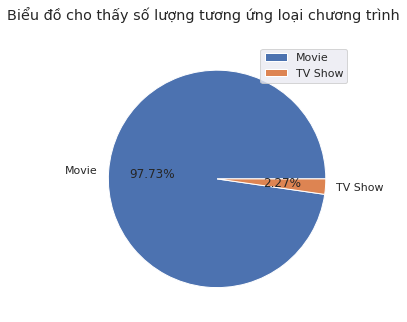

In [65]:
sns.set_theme()

all_type_df = pd.DataFrame(list_df['type'].value_counts())
all_type_df.plot(kind='pie', legend=True, title='Biểu đồ cho thấy số lượng tương ứng loại chương trình', 
                     subplots=True,autopct='%1.2f%%', figsize=(15,5), ylabel='')

- Vậy phần lớn đạo diễn thích chỉ đạo và diễn những phim lẻ hơn.

In [66]:
list_director, count_director = np.unique(np.sum(list_df['director']),return_counts=True)

director_df = pd.DataFrame(data=list(zip(list_director, count_director)),columns=['Name','Count'])\
                .sort_values(by=['Count'], ascending=False)\
                .drop(columns=['Count'])

top_10_director = director_df.head(10)

top_10_director

,Name
326,Yılmaz Erdoğan
223,Omoni Oboli
147,John Paul Tremblay
201,Mike Smith
257,Robb Wells
255,Ricky Gervais
297,Sylvester Stallone
178,Louis C.K.
217,Note Chern-Yim
250,Rano Karno


In [67]:
def f_director_cast_unique(x):
    list_director, count_director = np.unique(np.sum(x.loc[:,'director']),return_counts=True)
    
    director_by_type_df = pd.DataFrame(data=list(zip(list_director, count_director)),columns=['Director','Count'])\
                           .sort_values(by=['Count'], ascending=False)\
                           .set_index('Director')
    
    return director_by_type_df

list_director_cast_group = list_df.groupby(by=['type']).apply(lambda x: f_director_cast_unique(x)).unstack(0)

list_director_cast_group.columns = list_director_cast_group.columns.get_level_values(1)

list_director_cast_group = list_director_cast_group.fillna(value=0).astype(np.int32)

list_director_cast_group = list_director_cast_group.loc[top_10_director['Name'],:]

list_director_cast_group

type,Movie,TV Show
Director,,
Yılmaz Erdoğan,7,0
Omoni Oboli,6,0
John Paul Tremblay,4,1
Mike Smith,4,1
Robb Wells,4,1
Ricky Gervais,3,0
Sylvester Stallone,3,0
Louis C.K.,3,0
Note Chern-Yim,3,0


**Nhận xét**
- Mặc dù vẫn có đạo diễn diễn phim hoặc chương trình TV mà mình cũng tham gia, nhưng nó cũng không chiếm số lượng nhiều so với việc họ đạo diễn phim lẻ

### 3. Vẽ biểu đồ miền thể hiện tỷ lệ phim của 10 nước (có tổng số phim nhiều nhất) qua từng năm. Đồng thời đánh giá sự phát triển về số lượng phim qua từng năm của các quốc gia đó. Cho biết tình hình Việt Nam có phù hợp với biểu đồ chung đó không?

In [68]:
# 3./
is_not_nan_list_country = df_movies['country'].apply(lambda x: True if x != ['nan'] else False)
list_country, count_country = np.unique(np.sum(df_movies.loc[is_not_nan_list_country,'country']),return_counts=True)

country_df = pd.DataFrame(data=list(zip(list_country, count_country)),columns=['Country','Count'])\
                .sort_values(by=['Count'], ascending=False)\
                .drop(columns=['Count'])

top_10_country = country_df.loc[:,'Country'].head(10)

top_10_country

113     United States
43              India
111    United Kingdom
19             Canada
34             France
51              Japan
99              Spain
97        South Korea
36            Germany
65             Mexico
Name: Country, dtype: object

In [69]:
netflix_df_all = df_movies.loc[:,['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','release_year']].copy()
netflix_df_all['year_added'] = netflix_df_all.loc[:,'date_added'].dt.year

def DF_unique(x):
    list_country, count_country = np.unique(np.sum(x.loc[:,'country']),return_counts=True)
    
    country_by_year_df = pd.DataFrame(data=list(zip(list_country, count_country)),columns=['Country','Count'])\
                           .sort_values(by=['Count'], ascending=False)\
                           .set_index('Country')
    
    return country_by_year_df

netflix_df_all = netflix_df_all.groupby(['year_added']).apply(lambda x: DF_unique(x)).unstack(1)

netflix_df_all.columns = netflix_df_all.columns.get_level_values(1)

netflix_df_all = netflix_df_all.fillna(value=0).astype(np.int32)

netflix_df = netflix_df_all.loc[:,top_10_country]

netflix_df

Country,United States,India,United Kingdom,Canada,France,Japan,Spain,South Korea,Germany,Mexico
year_added,,,,,,,,,,
2008,2,0,0,0,0,0,0,0,0,0
2009,1,0,0,0,0,0,0,0,0,0
2010,1,0,0,0,0,0,0,0,0,0
2011,12,0,0,0,1,0,1,0,0,1
2012,3,0,0,0,0,0,0,0,0,1
2013,10,0,1,1,0,0,0,0,0,0
2014,23,0,2,4,0,0,0,0,0,0
2015,60,0,8,8,9,1,0,0,2,1
2016,204,14,54,31,29,31,17,11,14,9


In [70]:
data_perc = netflix_df.divide(netflix_df.sum(axis=1), axis=0)
data_perc

Country,United States,India,United Kingdom,Canada,France,Japan,Spain,South Korea,Germany,Mexico
year_added,,,,,,,,,,
2008,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011,0.800000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.066667
2012,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
2013,0.833333,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014,0.793103,0.000000,0.068966,0.137931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015,0.674157,0.000000,0.089888,0.089888,0.101124,0.011236,0.000000,0.000000,0.022472,0.011236
2016,0.492754,0.033816,0.130435,0.074879,0.070048,0.074879,0.041063,0.026570,0.033816,0.021739


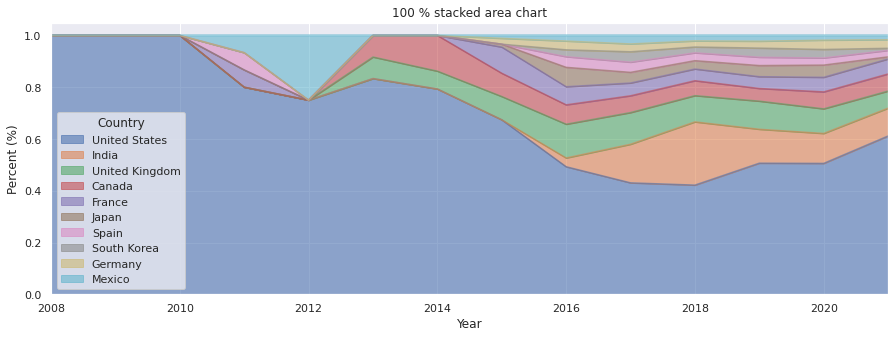

In [71]:
sns.set_theme()

ax = data_perc.plot(kind='area', stacked=True, title='100 % stacked area chart', 
                    figsize=(15,5), alpha=0.6, sharex=True )

ax.set_ylabel('Percent (%)')
ax.set_xlabel('Year')
ax.margins(0, 0)

plt.show()


**Nhận xét**
- Có vẻ tỷ lệ của Mỹ khá là cao so với những nước khác.
- Trải qua 13 năm, thị trường Châu Âu và Châu Á bắt đầu lấn chiếm thị trường Mỹ.

In [72]:
netflix_df_stacked = pd.DataFrame(netflix_df.stack(0)).reset_index()
netflix_df_stacked.columns = ['Year','Country','Films']
netflix_df_stacked

,Year,Country,Films
0,2008,United States,2
1,2008,India,0
2,2008,United Kingdom,0
3,2008,Canada,0
4,2008,France,0
...,...,...,...
135,2021,Japan,1
136,2021,Spain,3
137,2021,South Korea,1
138,2021,Germany,4


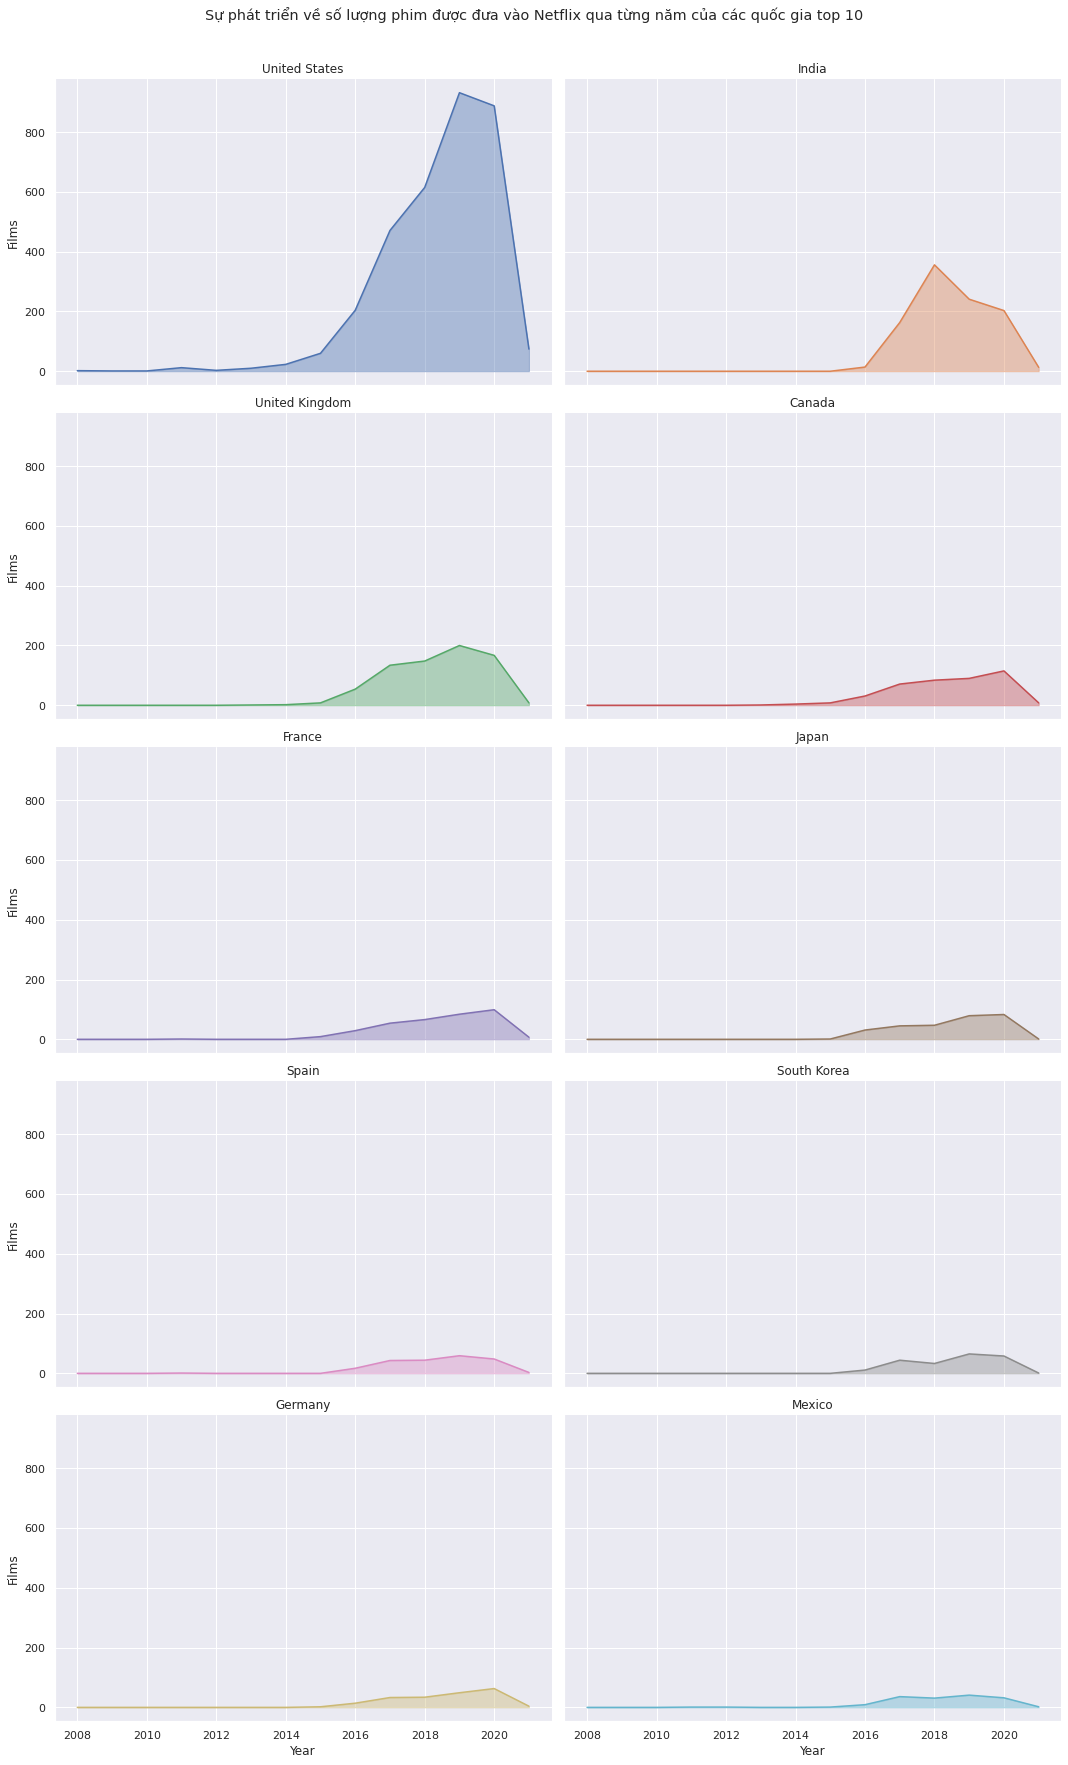

In [73]:
# Create a grid : initialize it
g = sns.FacetGrid(netflix_df_stacked, col='Country', hue='Country', 
                  col_wrap=2, height=5, aspect=1.5)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'Films')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'Year', 'Films', alpha=0.4)
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.94)
g = g.fig.suptitle('Sự phát triển về số lượng phim được đưa vào Netflix qua từng năm của các quốc gia top 10')

# Show the graph
plt.show()

# code được tham khảo từ: https://www.python-graph-gallery.com/242-area-chart-and-faceting

**Nhận Xét:**
- Trừ năm cuối cùng do dữ liệu bị nhật thiếu, thì 9/10 nước (trừ Canada) đều có xu hướng tăng số lượng phim được thêm vào Netflix

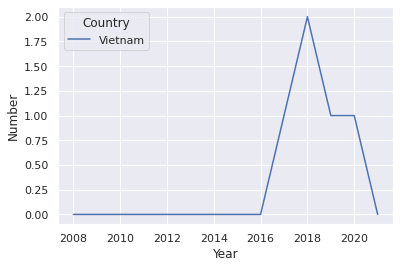

In [74]:
vietnam_df = netflix_df_all.loc[:,['Vietnam']]

sns.set_theme(style="darkgrid")

ax = sns.lineplot(data=vietnam_df)

ax.set(xlabel='Year', ylabel='Number')

plt.show()

In [75]:
df_movies.loc[df_movies.loc[:,'country'].apply(lambda x: 'Vietnam' in x),
              ['title', 'director', 'cast', 'country', 'date_added', 
                 'release_year', 'duration', 'listed_in', 'description',]]\
        .sort_values(by='release_year')

,title,director,cast,country,date_added,release_year,duration,listed_in,description
1482,Conjuring Spirit,[Van M. Pham],"Phuong Mai, Quang Su, Hoang Phuc Nguyen, Chi P...",[Vietnam],2018-08-28,2014,112 min,"Horror Movies, International Movies, Thrillers","In the wake of her husband's betrayal, a novel..."
3105,Jackpot,[Dustin Nguyen],"Chi Tai, Lan Ngoc, Dustin Nguyen, Thu Trang",[Vietnam],2018-10-06,2015,92 min,"Comedies, Dramas, International Movies",A lottery ticket salesperson faces an ethical ...
939,Bitcoin Heist,[Ham Tran],"Kate Nhung, Thanh Pham, Petey Majik Nguyen, Su...",[Vietnam],2017-09-02,2016,116 min,"Action & Adventure, Comedies, International Mo...","A unconventional, efficient Interpol special a..."
2318,Furie,[Le Van Kiet],"Ngo Thanh Van, Phan Thanh Nhien, Mai Cat Vi, T...",[Vietnam],2019-09-25,2019,97 min,"Action & Adventure, Dramas, International Movies",When traffickers kidnap her daughter from thei...
5654,Sky Tour: The Movie,[Nguyen Thanh Tung],Son Tung M-TP,[Vietnam],2020-09-02,2020,93 min,"Documentaries, International Movies, Music & M...","From the preparations to the performances, thi..."


**Nhận xét**
- Vậy biểu đồ tăng trưởng Việt Nam tương tự nhưng số lượng rất ít so với thế giới. 